
# 🌍 NERC Digital Gathering - Environmental Data Hackathon — MIDAS Notebook

Welcome to the NERC Digital Gathering hackathon!  
This notebook contains the challenge briefs and starter code for you to explore weather, climate, and soil data available through CEDA and other sources. In the hackathon we invite you to use NERC data and to explore the CEDA archive. However, Cranfield hold the national soil map and so if your hack involves soil you can also use that dataset too.

In the hackathon, we are offering a chance to explore and interact with a range of meteorological ands other data in CEDA - NERC's Centre for Environmental Data Analysis. The datasets we are looking at include ECMWF, HAD and MIDAS. These data are in different formats and structures so you can explore these differences as well.

**MIDAS** (Met Office Integrated Data Archive System): This is a database of raw weather observations from land and marine surface stations, both in the UK and globally. It contains daily, hourly and sub-hourly measurements of various parameters like temperature, rainfall, sunshine, wind, cloud cover, and present weather codes. MIDAS data is station based timeseries data in CSV format.

**ECMWF** (European Centre for Medium-Range Weather Forecasts): This organisation produces weather forecasts and climate reanalyses. ECMWF data includes estimates of atmospheric parameters like air temperature, pressure, and wind at different altitudes, as well as surface parameters like rainfall, soil moisture content, ocean-wave height, and sea-surface temperature, for the entire globe. They also have ocean reanalysis and analysis systems like OCEAN5. ECMWF has regional gridded data in NetCDF format.

**HadUK-Grid** is a dataset of gridded climate variables for the UK derived from interpolated land surface observations. It focuses on climate variables like temperature, rainfall, sunshine, mean sea level pressure, wind speed, relative humidity, vapour pressure, days of snow lying, and days of ground frost, at daily, monthly, seasonal, and annual timescales. HADUK has regional gridded data in NetCDF format.

**This notebook sets some challenges using the MIDAS (Met Office Integrated Data Archive System) data in CEDA.**

---

## ⚙️ Getting Started

1. **Load libraries**  
   The sorts of libraries you may need include `xarray`, `pandas`, `matplotlib`, and `scikit-learn`.  
   (Install with `pip install ...` if missing.)

2. **Accessing CEDA data with NetCDF**  
   Example:
   ```python
   import xarray as xr
   file_pattern = "/badc/ecmwf-era51/data/oper/an_sfc/2005/01/01/ecmwf-era51_oper_an_sfc_20050101*.2t.nc"
   ds = xr.open_mfdataset(file_pattern, chunks={'time': 24})  # Replace with your chosen dataset
   print(ds)
   ```

3. **Accessing CEDA data with CSV**  
   Example:
   ```python
   import pandas as pd
   file_pattern = "/badc/ukmo-midas-open/data/uk-daily-temperature-obs/dataset-version-202507/bedfordshire/00461_bedford/qc-version-1/midas-open_uk-daily-temperature-obs_dv-202507_bedfordshire_00461_bedford_qcv-1_2024.csv"
   df = pd.read_csv(file_pattern, skiprows=data_line+1)
   print(df.head())
   ```

4. **Notebook structure**  
   Each challenge is introduced in Markdown with background, tasks, and judging criteria.  
   Under each challenge you’ll find starter code cells to help you begin.  

---

## ⚙️ Geographical focus
In this hackathon, we will focus the hacking geographically. You can choose to look at the UK as a whole, or focus in on Bedfordshire where we are located. Geographical coordinates for these areas are as follows:

* UK bounding box (roughly -10°W to 3°E, 49–61°N)
* Bedfordshire bounding box (roughly -10°W to 3°E, 49–61°N)

## ⚙️ Useful links
Here are a few useful web addressses for CEDA data:
* CEDA Data home: https://data.ceda.ac.uk
* CEDA Help Doc home: https://help.ceda.ac.uk
* MIDAS User Guide: https://zenodo.org/records/7357335
* ECMWF website - https://www.ecmwf.int
* JASMIN Notebooks service help: https://help.jasmin.ac.uk/docs/interactive-computing/jasmin-notebooks-service/

---

# 📝 Challenges


## Challenge 1 — Weather Storytelling Dashboard

### Background
Weather data can be overwhelming to interpret — but good visualisation and narrative can bring it to life.

### Your Task
Tell a story using CEDA data. For example:
- Seasonal rainfall variation
- Temperature anomalies
- Heatwaves and cold snaps
- Sunshine vs. cloudiness

Here we provide some code to get you going using temperature data for the Bedford meteorological station. To develop on with the challenges, locate and include other meteorological datasets for Bedford station.

**Success criteria:** engaging visuals, clear story, reproducible code.


In [1]:
import pandas as pd

file = "/badc/ukmo-midas-open/data/uk-daily-temperature-obs/dataset-version-202507/bedfordshire/00461_bedford/qc-version-1/midas-open_uk-daily-temperature-obs_dv-202507_bedfordshire_00461_bedford_qcv-1_2024.csv"

# --- Step 1: Locate "data" line ---
with open(file, "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if line.strip().lower() == "data":
        data_line = i
        break

# --- Step 2: Read CSV properly ---
# skip all rows up to and including the "data" line
# header is the very next line (so header=0 relative to what's read)
df = pd.read_csv(file, skiprows=data_line+1)

# --- Step 3: Convert datetime column safely ---
df["ob_end_time"] = pd.to_datetime(df["ob_end_time"], errors="coerce")

# Drop rows where parsing failed (just in case)
df = df.dropna(subset=["ob_end_time"])

# Set index
df = df.set_index("ob_end_time")

print(df.head())

                    id_type      id  ob_hour_count  version_num  \
ob_end_time                                                       
2024-01-01 09:00:00    DCNN  3440.0           12.0          1.0   
2024-01-01 21:00:00    DCNN  3440.0           12.0          1.0   
2024-01-02 09:00:00    DCNN  3440.0           12.0          1.0   
2024-01-02 21:00:00    DCNN  3440.0           12.0          1.0   
2024-01-03 09:00:00    DCNN  3440.0           12.0          1.0   

                    met_domain_name  src_id  rec_st_ind  max_air_temp  \
ob_end_time                                                             
2024-01-01 09:00:00             NCM   461.0      1011.0           7.9   
2024-01-01 21:00:00             NCM   461.0      1011.0           8.3   
2024-01-02 09:00:00             NCM   461.0      1011.0          11.3   
2024-01-02 21:00:00             NCM   461.0      1011.0          12.9   
2024-01-03 09:00:00             NCM   461.0      1011.0           8.8   

                  

In [5]:
# Create a calculated mean air temperature field
# Note: The original data already has 'mean_air_temp', so we'll create 'calc_mean_air_temp'
# to compare with the original measured values

df['mean_air_temp'] = (df['max_air_temp'] + df['min_air_temp']) / 2


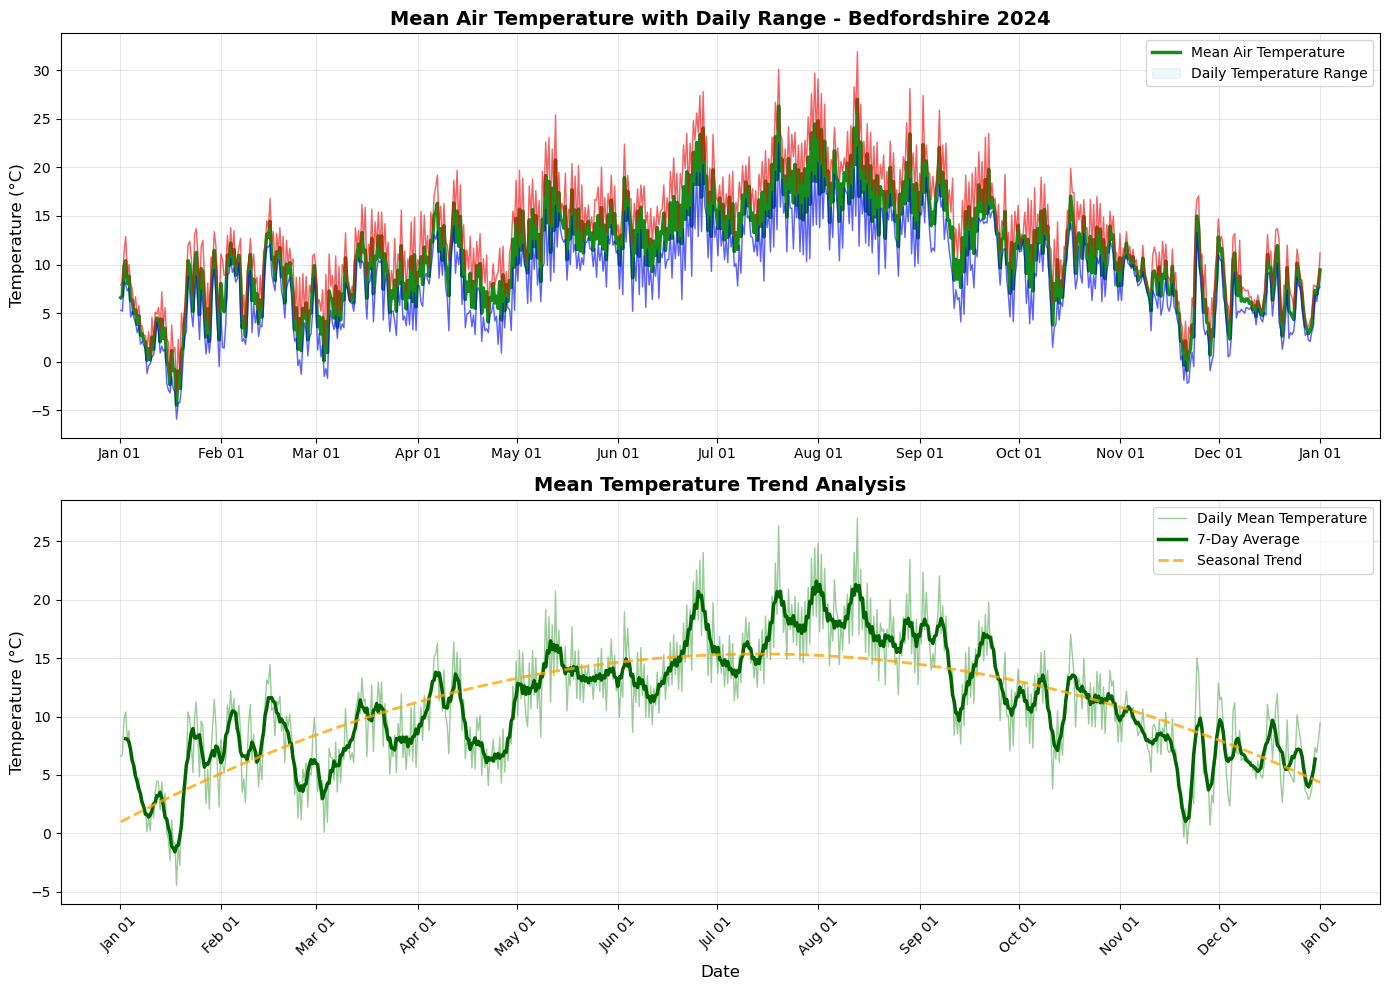

MEAN TEMPERATURE ANALYSIS - BEDFORDSHIRE 2024
Mean Air Temperature Statistics:
  - Annual average:     11.1°C
  - Annual minimum:     -4.5°C
  - Annual maximum:     27.0°C
  - Standard deviation: 5.3°C
  - Temperature range:  31.4°C

Monthly Mean Temperature Breakdown:
--------------------------------------------------
Jan:   4.5°C (range: -4.5°C to 11.4°C)
Feb:   7.8°C (range:  1.1°C to 14.4°C)
Mar:   7.9°C (range:  0.1°C to 13.3°C)
Apr:   9.6°C (range:  4.1°C to 16.4°C)
May:  13.7°C (range:  8.2°C to 20.8°C)
Jun:  14.9°C (range:  8.7°C to 24.1°C)
Jul:  17.0°C (range: 11.4°C to 26.3°C)
Aug:  17.9°C (range: 11.9°C to 27.0°C)
Sep:  14.3°C (range:  7.0°C to 22.4°C)
Oct:  11.3°C (range:  3.8°C to 17.0°C)
Nov:   7.2°C (range: -0.9°C to 15.0°C)
Dec:   6.8°C (range:  2.4°C to 11.9°C)

Temperature Extremes:
Coldest day: January 18 - -4.5°C
Hottest day:  August 12 - 27.0°C


In [6]:
# Focus on mean temperature with min/max context
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Create a figure with subplots for better analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Top plot: Mean temperature as primary focus with min/max context
ax1.plot(df.index, df['mean_air_temp'], label='Mean Air Temperature', color='green', linewidth=2.5, alpha=0.9)
ax1.fill_between(df.index, df['min_air_temp'], df['max_air_temp'], 
                 alpha=0.2, color='lightblue', label='Daily Temperature Range')
ax1.plot(df.index, df['min_air_temp'], color='blue', alpha=0.6, linewidth=1)
ax1.plot(df.index, df['max_air_temp'], color='red', alpha=0.6, linewidth=1)

ax1.set_title('Mean Air Temperature with Daily Range - Bedfordshire 2024', fontsize=14, fontweight='bold')
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# Bottom plot: Mean temperature trend analysis
# Calculate 7-day rolling average for smoother trend
df['mean_temp_7day'] = df['mean_air_temp'].rolling(window=7, center=True).mean()

ax2.plot(df.index, df['mean_air_temp'], label='Daily Mean Temperature', color='green', alpha=0.4, linewidth=1)
ax2.plot(df.index, df['mean_temp_7day'], label='7-Day Average', color='darkgreen', linewidth=2.5)

# Add seasonal trend line (polynomial fit)
x_numeric = np.arange(len(df))
z = np.polyfit(x_numeric, df['mean_air_temp'].dropna(), 2)
p = np.poly1d(z)
ax2.plot(df.index, p(x_numeric), '--', color='orange', linewidth=2, label='Seasonal Trend', alpha=0.8)

ax2.set_title('Mean Temperature Trend Analysis', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Temperature (°C)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Enhanced statistics focusing on mean temperature
print("=" * 60)
print("MEAN TEMPERATURE ANALYSIS - BEDFORDSHIRE 2024")
print("=" * 60)
print(f"Mean Air Temperature Statistics:")
print(f"  - Annual average:     {df['mean_air_temp'].mean():.1f}°C")
print(f"  - Annual minimum:     {df['mean_air_temp'].min():.1f}°C")
print(f"  - Annual maximum:     {df['mean_air_temp'].max():.1f}°C")
print(f"  - Standard deviation: {df['mean_air_temp'].std():.1f}°C")
print(f"  - Temperature range:  {df['mean_air_temp'].max() - df['mean_air_temp'].min():.1f}°C")
print()

# Monthly breakdown
monthly_stats = df.groupby(df.index.month)['mean_air_temp'].agg(['mean', 'min', 'max', 'std'])
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Monthly Mean Temperature Breakdown:")
print("-" * 50)
for month, stats in monthly_stats.iterrows():
    print(f"{month_names[month-1]:3s}: {stats['mean']:5.1f}°C (range: {stats['min']:4.1f}°C to {stats['max']:4.1f}°C)")

print()
print("Temperature Extremes:")
coldest_day = df.loc[df['mean_air_temp'].idxmin()]
hottest_day = df.loc[df['mean_air_temp'].idxmax()]
print(f"Coldest day: {coldest_day.name.strftime('%B %d')} - {coldest_day['mean_air_temp']:.1f}°C")
print(f"Hottest day:  {hottest_day.name.strftime('%B %d')} - {hottest_day['mean_air_temp']:.1f}°C")
print("=" * 60)


## Challenge 2 — Rainfall Prediction

### Background
Predicting rainfall helps agriculture, transport, and flood management.  
Can we predict rainfall tomorrow from the past few days?

You will now have to locate some of the other datasets for the Bedford Meteorological station in MIDAS on CEDA. Check out https://catalogue.ceda.ac.uk/uuid/dbd451271eb04662beade68da43546e1/?q=&results_per_page=20&sort_by=pub_date_desc&objects_related_to_uuid=dbd451271eb04662beade68da43546e1&permissions_option=any&geo_option=True&north_bound=&west_bound=&east_bound=&south_bound=&start_date=&end_date=&date_option=publication_date&start_date_pub=&end_date_pub=

### Your Task
- Use temperature, wind, cloud, humidity as predictors
- Compare simple regression vs. ML models

**Success criteria:** prediction accuracy, clarity of approach, reproducibility


In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("example_daily_weather.csv", parse_dates=["date"])

# Lagged features
for lag in [1,2,3]:
    df[f"temp_lag{lag}"] = df["temperature"].shift(lag)
df = df.dropna()

train = df.iloc[:-30]
test = df.iloc[-30:]

X_train = train[["temp_lag1","temp_lag2","temp_lag3","wind","cloud","humidity"]]
y_train = train["rainfall"]

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(test[X_train.columns])
print("MSE:", mean_squared_error(test["rainfall"], preds))



## Challenge 3 — Flood Risk Index

### Background
Flooding depends on rainfall intensity, soil moisture, and ground conditions.

### Your Task
- Create a “flood risk index” combining daily rainfall, recent cumulative rainfall, and soil data
- Visualise when/where risk is highest

**Success criteria:** logical index, clear visualisation, real-world usefulness


In [ ]:

df["rain_7d"] = df["rainfall"].rolling(window=7).sum()
df["flood_index"] = (df["rainfall"]/df["rainfall"].max() 
                     + df["rain_7d"]/df["rain_7d"].max() 
                     + df["soil_moisture"]/df["soil_moisture"].max())

df.plot(x="date", y="flood_index")



## Challenge 4 — Renewable Energy Forecasting

### Background
Weather drives renewable energy. Solar panels depend on sunshine; wind turbines depend on wind.

### Your Task
Estimate renewable generation potential (solar/wind) from weather data.  
Try to create a 24-hour forecast of energy potential.

**Success criteria:** creativity, clarity, reproducibility


In [ ]:

df["solar_index"] = df["radiation"] / df["radiation"].max()
df["wind_index"] = df["wind"]**3 / (df["wind"]**3).max()

df[["date","solar_index","wind_index"]].plot(x="date")



## Challenge 5 — Data Cleaning Showdown

### Background
Environmental datasets are often messy (missing values, varying scales).

### Your Task
- Build a pipeline that cleans and standardises one of the datasets
- Handle missing values, resample timescales, and make it analysis-ready

**Success criteria:** efficiency, clarity, reproducibility


In [ ]:

# Starter code: cleaning example
df = df.resample("D", on="date").mean()
df = df.interpolate(method="time")
df.head()



## Epilogue
In this notebook a range of data processing approaches and challenges have been set to work with MIDAS station data, for Bedford Meteorological station. Hopefully you will have followed the challenges, then perhaps tried to enhance and develop the ideas further. By example - could you compare data from two proximal stations and plot the differences?
